# Capsnets train + test

First, import stuff

In [5]:
import model
import data_loader
import tensorflow as tf

In [6]:
import warnings
warnings.filterwarnings('ignore')
tf.logging.set_verbosity(tf.logging.ERROR)

## Load word vectors and data

In [7]:
word2vec_path = '../../romanian_word_vecs/cc.ro.300.vec'

# No diacritics data
training_data_paths = [
        '../data-capsnets/scenario0/train.txt',
        '../data-capsnets/scenario1/train.txt',
        '../data-capsnets/scenario2/train.txt',
        '../data-capsnets/scenario3.1/train.txt',
        '../data-capsnets/scenario3.2/train.txt',
        '../data-capsnets/scenario3.3/train.txt',
    ]
test_data_paths = [
    '../data-capsnets/scenario0/test.txt',
    '../data-capsnets/scenario1/test.txt',
    '../data-capsnets/scenario2/test.txt',
    '../data-capsnets/scenario3.1/test.txt',
    '../data-capsnets/scenario3.2/test.txt',
    '../data-capsnets/scenario3.3/test.txt',
]

# Diacritics data
dia_training_data_paths = [
        '../data-capsnets/diacritics/scenario0/train.txt',
        '../data-capsnets/diacritics/scenario1/train.txt',
        '../data-capsnets/diacritics/scenario2/train.txt',
        '../data-capsnets/diacritics/scenario31/train.txt',
        '../data-capsnets/diacritics/scenario32/train.txt',
        '../data-capsnets/diacritics/scenario33/train.txt',
    ]
dia_test_data_paths = [
    '../data-capsnets/diacritics/scenario0/test.txt',
    '../data-capsnets/diacritics/scenario1/test.txt',
    '../data-capsnets/diacritics/scenario2/test.txt',
    '../data-capsnets/diacritics/scenario31/test.txt',
    '../data-capsnets/diacritics/scenario32/test.txt',
    '../data-capsnets/diacritics/scenario33/test.txt',
]
scenario_nums = [
    
]


In [8]:
print('------------------load word2vec begin-------------------')
w2v = data_loader.load_w2v(word2vec_path)
print('------------------load word2vec end---------------------')

------------------load word2vec begin-------------------
------------------load word2vec end---------------------


In [69]:
data = data_loader.read_datasets(w2v, dia_training_data_paths[5], dia_test_data_paths[5], test=True)

------------------read datasets begin-------------------
------------------read datasets end---------------------


# Train model

First, set the flags

In [10]:
def set_flags(data, scenario):
    FLAGS = tf.app.flags.FLAGS

    tf.app.flags.DEFINE_boolean('save_model', False, 'save model to disk')
    tf.app.flags.DEFINE_string('summaries_dir', './logs', 'tensorboard summaries')
    tf.app.flags.DEFINE_string('ckpt_dir', './saved_models/', 'check point dir')
    tf.app.flags.DEFINE_string('scenario_num', scenario, 'Scenario number')
    tf.app.flags.DEFINE_string('errors_dir', './errors/', 'Errors dir')
    
    vocab_size, word_emb_size = data['embedding'].shape
    _, max_sentence_length = data['x_tr'].shape
    intents_number = len(data['intents_dict'])
    slots_number = len(data['slots_dict'])
    hidden_size = 64

    tf.app.flags.DEFINE_float('keep_prob', 1, 'embedding dropout keep rate for training')
    tf.app.flags.DEFINE_integer('hidden_size', hidden_size, 'embedding vector size')
    tf.app.flags.DEFINE_integer('batch_size', 32, 'batch size')
    tf.app.flags.DEFINE_integer('num_epochs', 20, 'num of epochs')
    tf.app.flags.DEFINE_integer('vocab_size', vocab_size, 'vocab size of word vectors')
    tf.app.flags.DEFINE_integer('max_sentence_length', max_sentence_length, 'max number of words in one sentence')
    tf.app.flags.DEFINE_integer('intents_nr', intents_number, 'intents_number')  #
    tf.app.flags.DEFINE_integer('slots_nr', slots_number, 'slots_number')  #
    tf.app.flags.DEFINE_integer('word_emb_size', word_emb_size, 'embedding size of word vectors')
    tf.app.flags.DEFINE_boolean('use_embedding', True, 'whether to use embedding or not.')
    tf.app.flags.DEFINE_float('learning_rate', 0.01, 'learning rate')
    tf.app.flags.DEFINE_integer('slot_routing_num', 2, 'slot routing num')
    tf.app.flags.DEFINE_integer('intent_routing_num', 3, 'intent routing num')
    tf.app.flags.DEFINE_integer('intent_output_dim', 16, 'intent output dimension')
    tf.app.flags.DEFINE_integer('slot_output_dim', 2 * hidden_size, 'slot output dimension')
    tf.app.flags.DEFINE_integer('d_a', 20, 'self attention weight hidden units number')
    tf.app.flags.DEFINE_integer('r', 5, 'number of self attention heads')
    tf.app.flags.DEFINE_float('alpha', 0.0001, 'coefficient for self attention loss')
    tf.app.flags.DEFINE_integer('n_splits', 3, 'Number of cross-validation splits')
    
    tf.app.flags.DEFINE_string('f', '', 'kernel') # Without this there's an error: unknown command line flag 'f'
    
    return FLAGS

In [72]:
def del_all_flags(FLAGS):
    flags_dict = FLAGS._flags()
    keys_list = [keys for keys in flags_dict]
    for keys in keys_list:
        FLAGS.__delattr__(keys)
        
del_all_flags(FLAGS)

In [71]:
import train

FLAGS = set_flags(data, scenario='33-dia-seqmini')
train.train(data, FLAGS, batches_rand=False)


------------------start cross-validation-------------------
FOLD 1
Initializing Variables
using pre-trained word emebedding.begin...
using pre-trained word emebedding.ended...
           VALIDATION SET PERFORMANCE        
Intent detection
Intent accuracy 0.005128
F score 0.005128
Slot filling
F1 score: 0.031811
Accuracy: 0.048291
------------------epoch :  0  Loss:  22.335968 ----------------------
           VALIDATION SET PERFORMANCE        
Intent detection
Intent accuracy 0.394872
F score 0.394872
Slot filling
F1 score: 0.293040
Accuracy: 0.842735
Current F score mean 0.34395604395604396
Best F score mean 0.34395604395604396
------------------epoch :  1  Loss:  3.9123967 ----------------------
           VALIDATION SET PERFORMANCE        
Intent detection
Intent accuracy 0.825641
F score 0.825641
Slot filling
F1 score: 0.632801
Accuracy: 0.925214
Current F score mean 0.7292210933720367
Best F score mean 0.7292210933720367
------------------epoch :  2  Loss:  1.5468771 -------------

------------------epoch :  5  Loss:  0.19209099 ----------------------
           VALIDATION SET PERFORMANCE        
Intent detection
Intent accuracy 0.933333
F score 0.933333
Slot filling
F1 score: 0.984663
Accuracy: 0.993590
Current F score mean 0.958997955010225
Best F score mean 0.9893944865775852
------------------epoch :  6  Loss:  0.16434374 ----------------------
           VALIDATION SET PERFORMANCE        
Intent detection
Intent accuracy 0.969231
F score 0.969231
Slot filling
F1 score: 0.983155
Accuracy: 0.993590
Current F score mean 0.976192719990576
Best F score mean 0.9893944865775852
------------------epoch :  7  Loss:  0.20159692 ----------------------
           VALIDATION SET PERFORMANCE        
Intent detection
Intent accuracy 0.979487
F score 0.979487
Slot filling
F1 score: 0.989313
Accuracy: 0.997436
Current F score mean 0.9844000782932081
Best F score mean 0.9893944865775852
------------------epoch :  8  Loss:  0.11275438 ----------------------
           VALIDATI

           VALIDATION SET PERFORMANCE        
Intent detection
Intent accuracy 0.989744
F score 0.989744
Slot filling
F1 score: 0.989313
Accuracy: 0.998291
Current F score mean 0.9895282834214132
Best F score mean 0.9928487414725947
------------------epoch :  12  Loss:  0.17797655 ----------------------
           VALIDATION SET PERFORMANCE        
Intent detection
Intent accuracy 0.989744
F score 0.989744
Slot filling
F1 score: 0.989313
Accuracy: 0.998291
Current F score mean 0.9895282834214132
Best F score mean 0.9928487414725947
------------------epoch :  13  Loss:  0.16247833 ----------------------
           VALIDATION SET PERFORMANCE        
Intent detection
Intent accuracy 0.989744
F score 0.989744
Slot filling
F1 score: 0.989313
Accuracy: 0.998291
Current F score mean 0.9895282834214132
Best F score mean 0.9928487414725947
------------------epoch :  14  Loss:  0.14636852 ----------------------
           VALIDATION SET PERFORMANCE        
Intent detection
Intent accuracy 0.9897

# Test

Restoring Variables from Checkpoint for testing
           TEST SET PERFORMANCE        
Intent detection
                          precision    recall  f1-score   support

           aprindeLumina     0.1111    0.1000    0.1053        30
 cresteIntensitateLumina     0.4468    0.7000    0.5455        30
       cresteTemperatura     0.0000    0.0000    0.0000        30
           opresteMuzica     0.1724    0.1667    0.1695        30
               opresteTV     0.3000    0.1000    0.1500        30
              pornesteTV     0.6000    0.5000    0.5455        30
              puneMuzica     0.2400    0.4000    0.3000        30
  scadeIntensitateLumina     0.0000    0.0000    0.0000        30
        scadeTemperatura     0.1667    0.0667    0.0952        30
          schimbaCanalTV     0.2683    0.3667    0.3099        30
schimbaIntensitateMuzica     0.8788    0.9667    0.9206        30
      seteazaTemperatura     0.2449    0.4000    0.3038        30
            stingeLumina     0.0000 

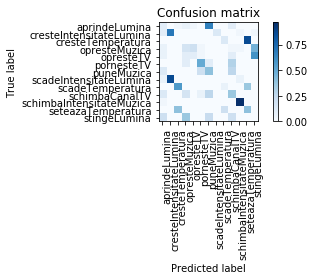

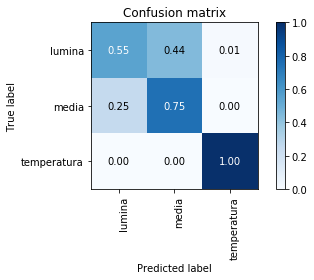

Intent F1: 0.289744
Slot F1: 0.479076


In [73]:
import test
FLAGS = set_flags(data, scenario='33-dia-seqmini')
test.test(data, FLAGS)